<a href="https://colab.research.google.com/github/LazyHooks/AI_Jobs_Disruption/blob/main/HR_aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warning override

In [83]:
import warnings

warnings.filterwarnings('ignore')

input

In [84]:
df = pd.read_csv("Aug.csv")

exploratory

In [85]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Knowledge        88 non-null     int64
 1   Problem Solving  88 non-null     int64
 2   Interaction      88 non-null     int64
 3   Impact           88 non-null     int64
 4   Accountability   88 non-null     int64
dtypes: int64(5)
memory usage: 3.6 KB


In [86]:
df.head()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,52,27,27,30,0
1,52,27,27,30,0
2,52,27,27,30,0
3,52,36,36,30,0
4,52,36,27,30,0


checks

In [87]:
df.isnull().sum()
df.describe()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
count,88.000000,88.000000,88.000000,88.000000,88.000000
mean,89.954545,50.897727,38.829545,45.738636,0.238636
std,44.063671,19.580685,11.733851,14.544813,2.238608
min,52.000000,27.000000,27.000000,30.000000,0.000000
25%,52.000000,36.000000,27.000000,30.000000,0.000000
50%,75.000000,48.000000,36.000000,55.000000,0.000000
75%,103.000000,65.000000,43.000000,55.000000,0.000000
max,219.000000,117.000000,84.000000,74.000000,21.000000


In [88]:
X=df

Scaling

In [89]:
cols = X.columns

In [90]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [91]:
X = pd.DataFrame(X, columns=[cols])

In [92]:
X.head()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.1,0.157895,0.0,0.0
4,0.0,0.1,0.000000,0.0,0.0


In [93]:
X.dropna(inplace=True)
X.shape

(88, 5)

K means

In [94]:
# 2 cluster
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

centers

In [95]:
kmeans.cluster_centers_

array([[1.60479042e-01, 2.01388889e-01, 1.92543860e-01, 1.19318182e-02,
        5.20417043e-18],
       [2.82934132e-01, 3.18981481e-01, 2.20029240e-01, 6.45833333e-01,
        2.08333333e-02]])

inertia

In [96]:
kmeans.inertia_

14.935002780747372

Elbow

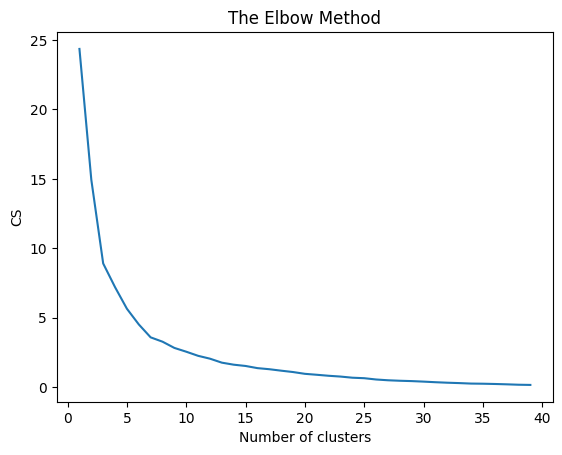

In [97]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 40):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 40), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

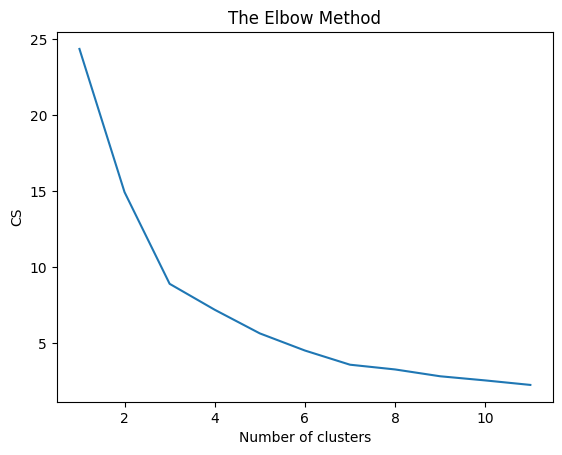

In [98]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 12), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

individual k mean

In [99]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [100]:
labels=kmeans.labels_
pd.DataFrame(labels).to_csv('aug_hr_l.csv')
print(labels)

[1 1 1 1 1 1 0 1 0 1 2 2 2 1 1 1 1 1 1 2 1 1 1 0 1 1 2 1 1 1 1 2 2 2 1 2 2
 1 0 2 1 1 2 2 0 1 0 0 0 0 0 2 2 2 1 1 2 2 2 2 2 2 2 1 1 1 1 2 2 2 1 1 2 2
 2 2 2 2 2 2 1 2 0 0 2 2 2 0]


In [101]:
Z=kmeans.cluster_centers_
Z

array([[7.54951635e-01, 5.30769231e-01, 5.64102564e-01, 4.80769231e-01,
        7.69230769e-02],
       [1.10859362e-01, 2.09609610e-01, 1.44144144e-01, 8.59950860e-03,
        5.20417043e-18],
       [1.60100851e-01, 2.29239766e-01, 1.47276085e-01, 6.55502392e-01,
        6.93889390e-18]])

In [102]:
import matplotlib

In [103]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2500, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])


[t-SNE] Computing 87 nearest neighbors...
[t-SNE] Indexed 88 samples in 0.001s...
[t-SNE] Computed neighbors for 88 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 88 / 88
[t-SNE] Mean sigma: 0.375815
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.377804
[t-SNE] KL divergence after 2500 iterations: -0.750814


In [104]:
np.unique(labels)


array([0, 1, 2], dtype=int32)

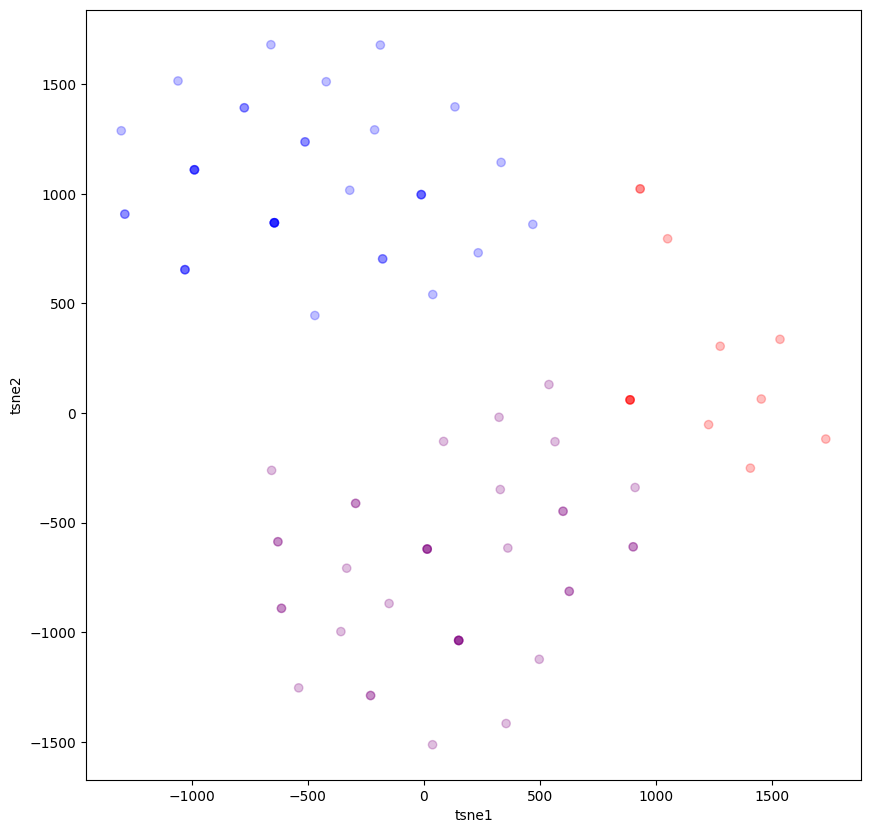

In [105]:
colors = ["red","green","blue","purple"]
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

Reverse Scaling

In [106]:
Z2 = ms.inverse_transform(Z)
pd.DataFrame(Z2).to_csv('cc_hr_aug.csv')
Z2

array([[1.78076923e+02, 7.47692308e+01, 5.91538462e+01, 5.11538462e+01,
        1.61538462e+00],
       [7.05135135e+01, 4.58648649e+01, 3.52162162e+01, 3.03783784e+01,
        1.09287579e-16],
       [7.87368421e+01, 4.76315789e+01, 3.53947368e+01, 5.88421053e+01,
        1.45716772e-16]])